<a href="https://colab.research.google.com/github/FelipeBuonoEvangelista/An-lise-Descritiva-Explorat-ria-e-Preditiva-de-um-banco-de-dados-de-vendas/blob/main/Desafio5ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparando um dataset para modelagem de dados

##Objetivo:Aplicação de Limpeza e Organização de Dados para Estruturar uma Base de Dados para Modelagem

O objetivo deste tópico é abordar a importância da limpeza e organização de dados (data cleaning & data wrangling) na carreira de um cientista de dados. Uma parte significativa do trabalho de um cientista de dados envolve garantir que as bases de dados estejam bem organizadas e prontas para análise e modelagem.

A limpeza de dados envolve a identificação e correção de erros, valores ausentes e inconsistências nos dados. Já o data wrangling consiste em transformar e formatar os dados de maneira que sejam adequados para análise, o que inclui a combinação de diferentes conjuntos de dados, criação de variáveis derivadas e padronização de formatos.

In [ ]:
#Instalando Bilibotecas importantes
!pip install sidetable
!pip install pandas-profiling==3.3.0
!pip install pandas

In [28]:
#Bibliotecas usadas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import requests

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets
from io import StringIO

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [29]:
#Deixando o seaborn com um visual mais agradável
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [30]:
#função pra deixar as tabelas na mesma linha (lado a lado)
def display_side_by_side(dataframes:list,titles:list):
    html_str=''
    for df,title in zip(dataframes, titles):
        html_str+=f'<span>{title}:</span>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+="&nbsp"*10
    display(HTML(html_str))

In [31]:
def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

In [32]:
#URL do desafio
url = "https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F7c207e3f-d962-4cdb-bc6b-f49ed41f77e4%2Fdata.csv?table=block&id=f44f0180-d4c9-4f47-89c9-ee2a263a6169&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2"

# Baixar o arquivo .csv
response = requests.get(url)
data = response.text

# Ler o arquivo .csv usando o Pandas
df = pd.read_csv(StringIO(data))

In [33]:
#visualisando os dados
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#Analisando os Valores Duplicados

In [35]:
# Identificar valores duplicados
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [36]:
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6

In [37]:
# Remover valores duplicados
df = df.drop_duplicates()

In [38]:
#Provando que não há valores Duplicados
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#Analisando Valores Nulos

In [39]:
# Identificar e mostrar valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
CustomerID,135037,25.16%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [40]:
#Dropando valores nulos
df = df.dropna(axis=0)

In [41]:
#Mostrando que não existem mais valores nulos

df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
InvoiceNo,0,0.00%
StockCode,0,0.00%
Description,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
CustomerID,0,0.00%
Country,0,0.00%


#Analisando Preços unitários e quantidade de produtos iguais ou inferiores a 0

In [42]:
#visualisando meus dados
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [43]:
#Aceitando apenas valores maiores que 0 no preço unitário
df = df[df.UnitPrice > 0.0]
#Aceitando apenas valores maiores que 0 na quantidade
df = df[df.Quantity > 0]
#Provando que os valores são maiores que 0
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


#Analisando os tipos de dados das colunas

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [45]:
#Corrigindo o formato data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [47]:
#Corrigindo o formato do CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


#Removendo OutLiers

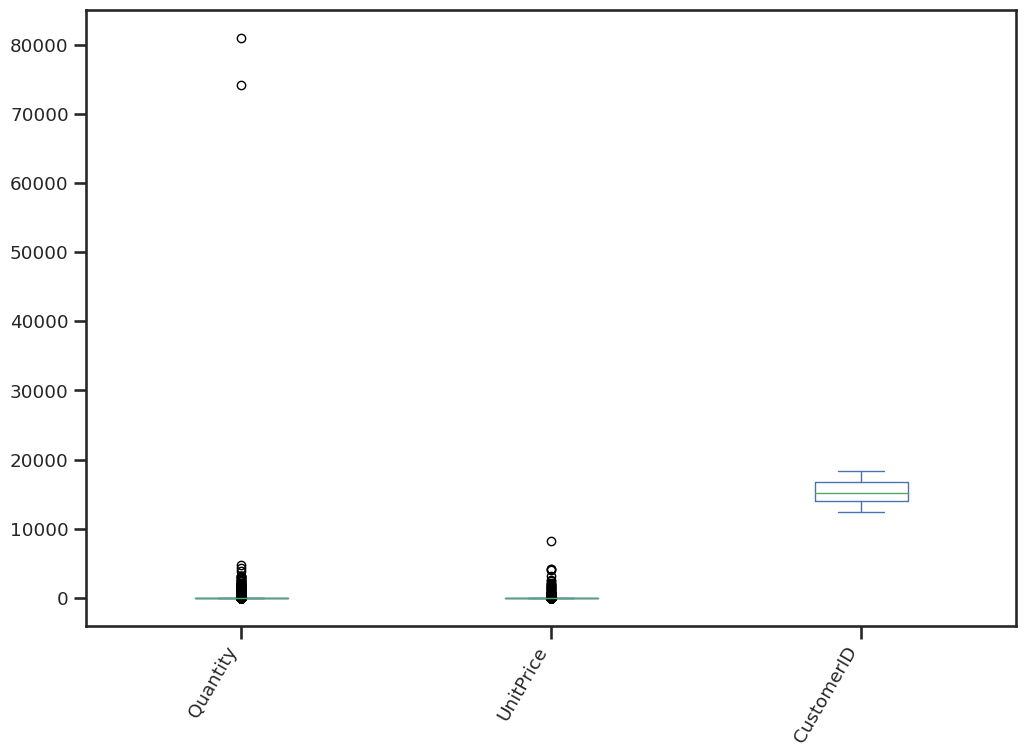

In [53]:
#Encontrando os Outliers
# Box plot com dados "as is"
df.plot.box()
plt.xticks(rotation=60, ha='right');

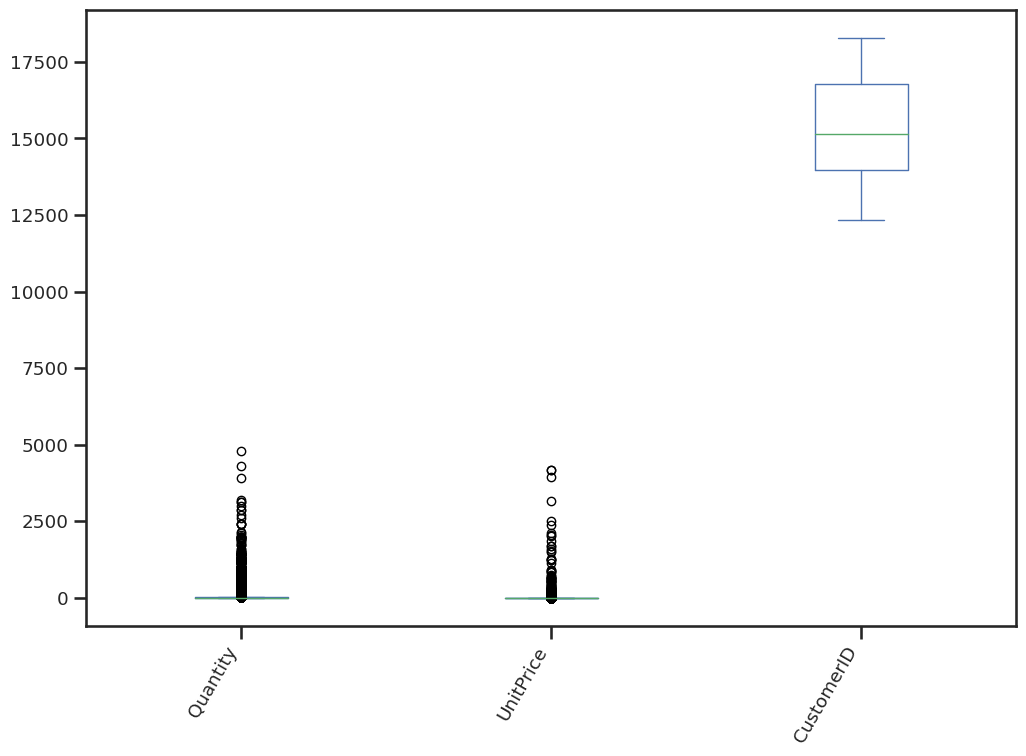

In [56]:
#Removendo as outliers
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]
# Provando que as outliers sumiram
df.plot.box()
plt.xticks(rotation=60, ha='right');

Criando Uma Coluna Com o preço Total

In [57]:
#Criando a coluna
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34



#Visualisando a Data Máxima



In [64]:
#Criando uma variável com a data máxima
dfdata = df['InvoiceDate'].max()
print(dfdata)

2011-12-09 12:50:00


#Criando Gráficos

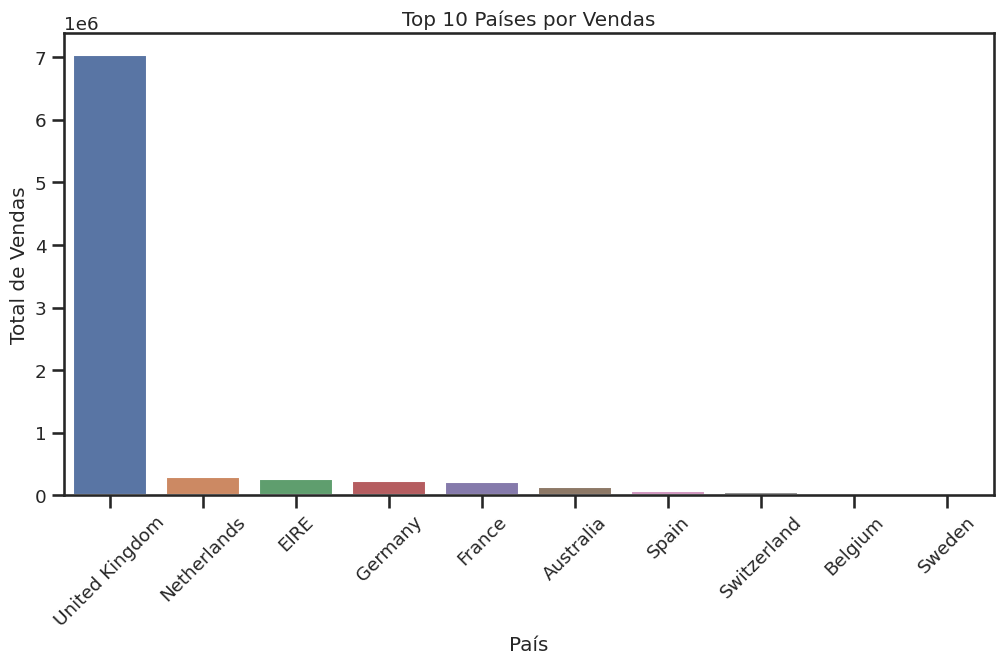

In [79]:
#Top 10 países com maior valor em vendas

# Agrupando os dados por país e calculando a soma das vendas por país
vendas_por_pais = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Ordenando os dados pela coluna de vendas de forma decrescente
vendas_por_pais = vendas_por_pais.sort_values('TotalPrice', ascending=False)

# Selecionando os top 10 países com as maiores vendas
top_10_paises = vendas_por_pais.head(10)

#Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', data=top_10_paises)
plt.xlabel('País')
plt.ylabel('Total de Vendas')
plt.title('Top 10 Países por Vendas')
plt.xticks(rotation=45)
plt.show()

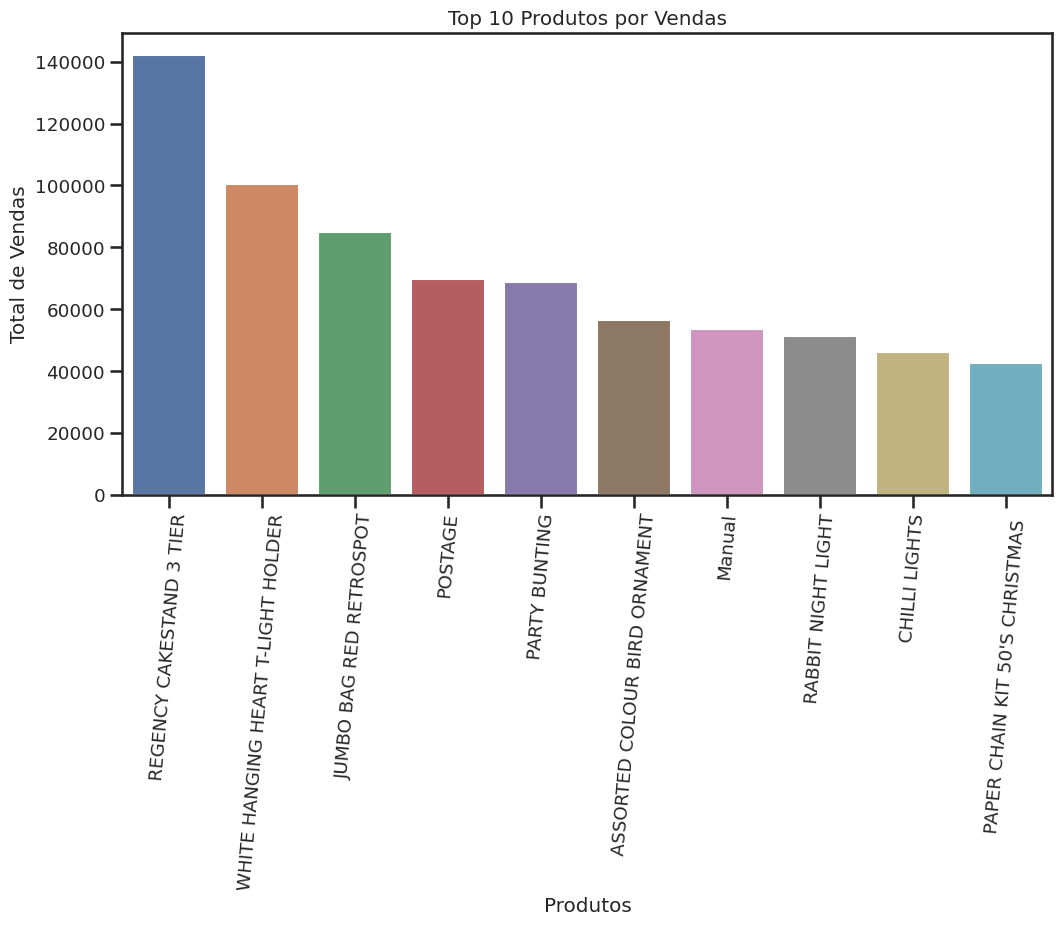

In [92]:
#Top 10 produtos mais vendidos

# Agrupando os dados pela descrição e calculando a soma das vendas por descrição
vendas_por_produto = df.groupby('Description')['TotalPrice'].sum().reset_index()

# Ordenando os dados pela coluna de vendas de forma decrescente
vendas_por_produto = vendas_por_produto.sort_values('TotalPrice', ascending=False)

# Selecionando os top 10 produtos com as maiores vendas
top_10_produtos = vendas_por_produto.head(10)

#Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Description', y='TotalPrice', data=top_10_produtos, order=top_10_produtos['Description'])
plt.xlabel('Produtos')
plt.ylabel('Total de Vendas')
plt.title('Top 10 Produtos por Vendas')
plt.xticks(rotation=85)
plt.show()

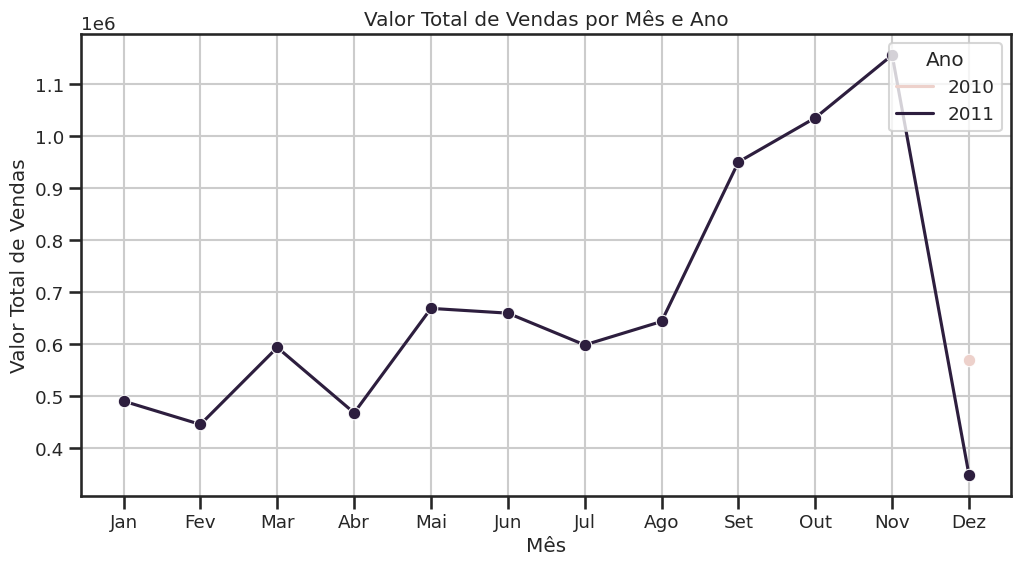

In [95]:
#Valor de venda total por mês

# Extraiando o mês de cada data

df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Agrupando os dados por mês e calculando o valor total de vendas

vendas_por_ano_mes = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Crie o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalPrice', hue='Year', data=vendas_por_ano_mes, marker='o')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor Total de Vendas por Mês e Ano')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano', loc='upper right')
plt.grid(True)
plt.show()

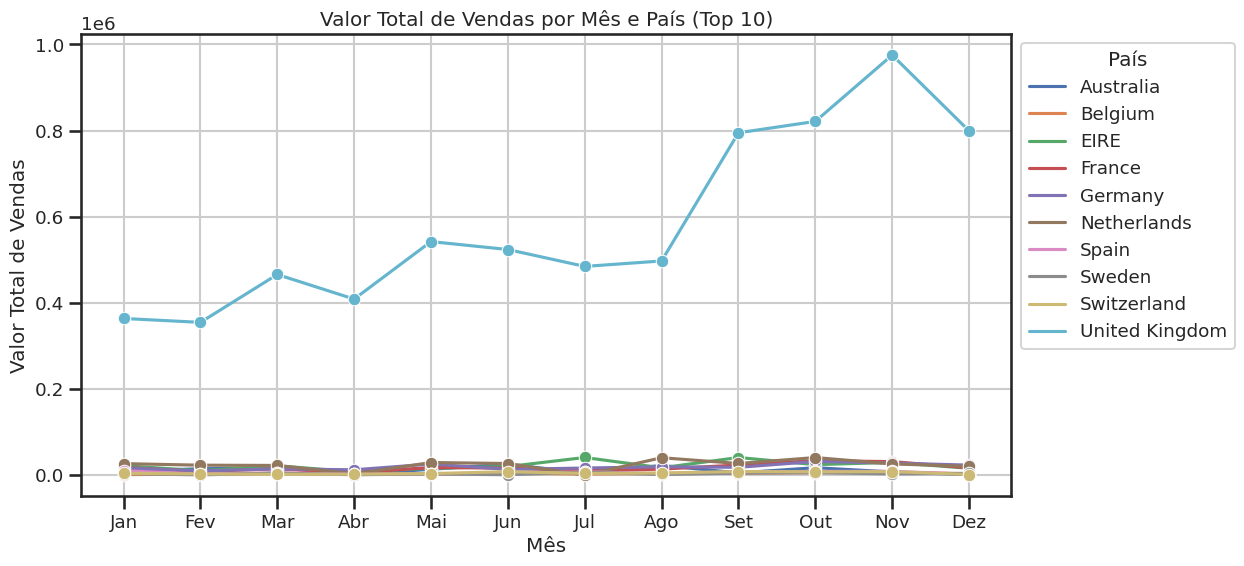

In [96]:
#Valor de venda total por mês e por país (considere apenas os top 10)

# Extraindo o mês de cada data
df['Month'] = df['InvoiceDate'].dt.month

# Agrupe os dados por mês e país e calcule o valor total de vendas
vendas_por_mes_pais = df.groupby(['Month', 'Country'])['TotalPrice'].sum().reset_index()

# Selecione apenas os top 10 países com as maiores vendas
top_10_paises = vendas_por_mes_pais.groupby('Country')['TotalPrice'].sum().nlargest(10).index
vendas_por_mes_pais_top_10 = vendas_por_mes_pais[vendas_por_mes_pais['Country'].isin(top_10_paises)]

# Crie o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalPrice', hue='Country', data=vendas_por_mes_pais_top_10, marker='o')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.title('Valor Total de Vendas por Mês e País (Top 10)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='País', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()

#Calculando o RFM

In [97]:

# Agrupando os dados por cliente e pedido para obter a data da última compra e o preço total do pedido
rfm_data = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',
    'TotalPrice': 'sum'
}).reset_index()

# Calculando a recência (R), frequência (F) e valor médio das compras (M) para cada cliente
rfm = rfm_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'mean'
}).reset_index()

# Renomeando as colunas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Exibindo o resultado
print(rfm.head())

   CustomerID  Recency  Frequency     Monetary
0       12347        1          7   615.714286
1       12348       74          4   449.310000
2       12349       18          1  1757.550000
3       12350      309          1   334.400000
4       12352       35          8   313.255000
